In [1]:
experiment_ids = 'A1 A2 A3 A4 A5 A6 A7 A8 A9 B1 B10 B11 B12 B13 B14 B15 B16 B17 B18 B19 B2 B20 B21 B22 B23 B25 B26 B27 B29 B3 B30 B31 B32 B33 B34 B35 B36 B37 B38 B39 B4 B40 B41 B42 B43 B44 B45 B47 B48 B49 B5 B50 B51 B53 B54 B6 B7 B8 B9 sc1 sc10 sc11 sc12 sc13 sc14 sc15 sc16 sc17 sc18 sc19 sc2 sc20 sc21 sc22 sc23 sc24 sc25 sc26 sc27 sc28 sc29 sc32 sc34 sc35 sc36 sc4 sc7 sc9'.split()

# Robustness analysis

In [2]:
import glob
from basic_utils import *

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [121]:
df_robustness = pd.read_csv('../DATA/TMP/robustness_anaylsys.py')
df_robustness['idx_selected'] = df_robustness['idx_total_fasta'] - df_robustness['n_deleted_fasta']

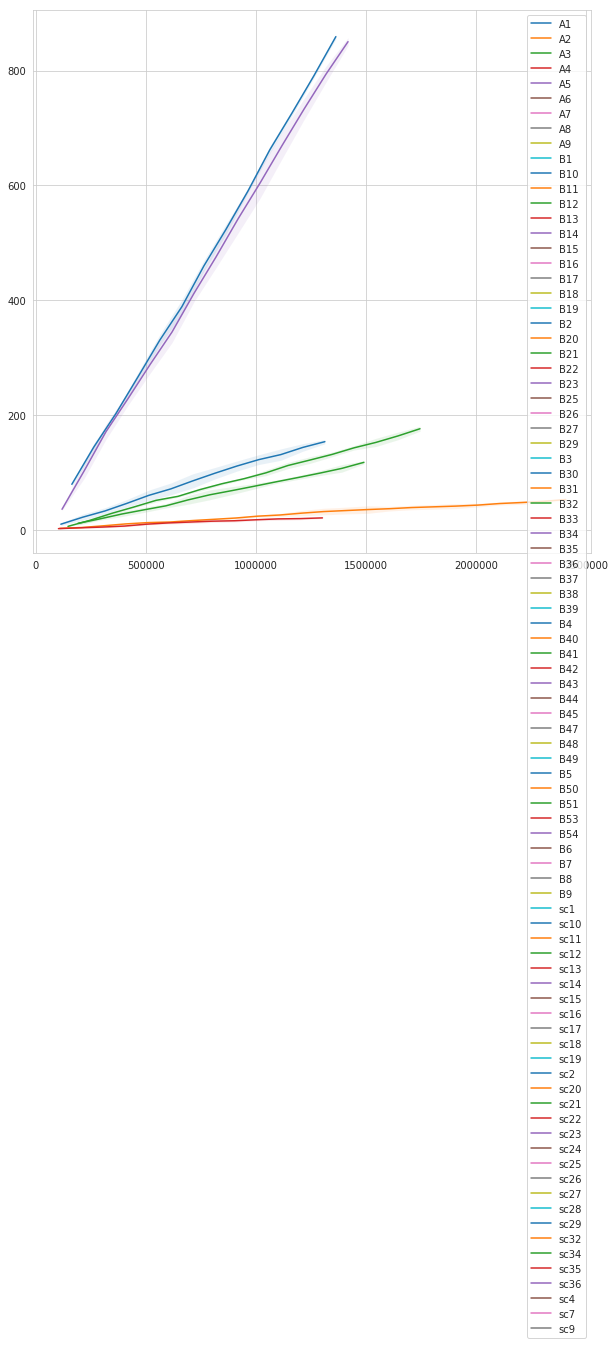

In [122]:
plt.figure(figsize=[10,10])

df_mean = df_robustness.groupby(['exp', 'n_deleted_fasta']).mean().reset_index()
df_std = df_robustness.groupby(['exp', 'n_deleted_fasta']).std().reset_index()

for exp in experiment_ids:
    means_x = df_mean.query('exp=="{}"'.format(exp))['idx_selected']
    means_y = df_mean.query('exp=="{}"'.format(exp))['n_contacts_remained']
    stds_y = df_std.query('exp=="{}"'.format(exp))['n_contacts_remained']
    plt.plot(means_x, means_y, label=exp)
    plt.fill_between(means_x, means_y-stds_y, means_y+stds_y, alpha=.1)
    
plt.legend()

## Scalings

In [113]:
experiment_ids_selected = 'A6 B31 A8 A5 sc23 B26 B19 B16 sc16 B3 A2 A3 sc1 B6 A9 sc24 sc29 sc19 sc21 B15'.split()

In [114]:
# Create merged cells for detection of non-covered bins
PATH_COOL = '../DATA/COOL/'
for resolution in [100, 20, 10, 1]:
    print(resolution)
    files = list(map(lambda x: PATH_COOL + x + ".{}.cool".format(resolution), experiment_ids_selected))
    output = PATH_COOL + "merged_cell.{}.cool".format(resolution)
    merge_single_cells(output, files=files)

INFO:root:cooler merge ../DATA/COOL/merged_cell.100.cool ../DATA/COOL/A6.100.cool ../DATA/COOL/B31.100.cool ../DATA/COOL/A8.100.cool ../DATA/COOL/A5.100.cool ../DATA/COOL/sc23.100.cool ../DATA/COOL/B26.100.cool ../DATA/COOL/B19.100.cool ../DATA/COOL/B16.100.cool ../DATA/COOL/sc16.100.cool ../DATA/COOL/B3.100.cool ../DATA/COOL/A2.100.cool ../DATA/COOL/A3.100.cool ../DATA/COOL/sc1.100.cool ../DATA/COOL/B6.100.cool ../DATA/COOL/A9.100.cool ../DATA/COOL/sc24.100.cool ../DATA/COOL/sc29.100.cool ../DATA/COOL/sc19.100.cool ../DATA/COOL/sc21.100.cool ../DATA/COOL/B15.100.cool


100


INFO:root:Check stdout: b''
INFO:root:Stderr is not empty. Might be an error in call_and_check_errors for the command: cooler merge ../DATA/COOL/merged_cell.100.cool ../DATA/COOL/A6.100.cool ../DATA/COOL/B31.100.cool ../DATA/COOL/A8.100.cool ../DATA/COOL/A5.100.cool ../DATA/COOL/sc23.100.cool ../DATA/COOL/B26.100.cool ../DATA/COOL/B19.100.cool ../DATA/COOL/B16.100.cool ../DATA/COOL/sc16.100.cool ../DATA/COOL/B3.100.cool ../DATA/COOL/A2.100.cool ../DATA/COOL/A3.100.cool ../DATA/COOL/sc1.100.cool ../DATA/COOL/B6.100.cool ../DATA/COOL/A9.100.cool ../DATA/COOL/sc24.100.cool ../DATA/COOL/sc29.100.cool ../DATA/COOL/sc19.100.cool ../DATA/COOL/sc21.100.cool ../DATA/COOL/B15.100.cool
INFO:root:Check stderr: b'INFO:cooler:Merging:\n../DATA/COOL/A6.100.cool\n../DATA/COOL/B31.100.cool\n../DATA/COOL/A8.100.cool\n../DATA/COOL/A5.100.cool\n../DATA/COOL/sc23.100.cool\n../DATA/COOL/B26.100.cool\n../DATA/COOL/B19.100.cool\n../DATA/COOL/B16.100.cool\n../DATA/COOL/sc16.100.cool\n../DATA/COOL/B3.100.cool\n

20


INFO:root:Check stdout: b''
INFO:root:Stderr is not empty. Might be an error in call_and_check_errors for the command: cooler merge ../DATA/COOL/merged_cell.20.cool ../DATA/COOL/A6.20.cool ../DATA/COOL/B31.20.cool ../DATA/COOL/A8.20.cool ../DATA/COOL/A5.20.cool ../DATA/COOL/sc23.20.cool ../DATA/COOL/B26.20.cool ../DATA/COOL/B19.20.cool ../DATA/COOL/B16.20.cool ../DATA/COOL/sc16.20.cool ../DATA/COOL/B3.20.cool ../DATA/COOL/A2.20.cool ../DATA/COOL/A3.20.cool ../DATA/COOL/sc1.20.cool ../DATA/COOL/B6.20.cool ../DATA/COOL/A9.20.cool ../DATA/COOL/sc24.20.cool ../DATA/COOL/sc29.20.cool ../DATA/COOL/sc19.20.cool ../DATA/COOL/sc21.20.cool ../DATA/COOL/B15.20.cool
INFO:root:Check stderr: b'INFO:cooler:Merging:\n../DATA/COOL/A6.20.cool\n../DATA/COOL/B31.20.cool\n../DATA/COOL/A8.20.cool\n../DATA/COOL/A5.20.cool\n../DATA/COOL/sc23.20.cool\n../DATA/COOL/B26.20.cool\n../DATA/COOL/B19.20.cool\n../DATA/COOL/B16.20.cool\n../DATA/COOL/sc16.20.cool\n../DATA/COOL/B3.20.cool\n../DATA/COOL/A2.20.cool\n../DAT

10


INFO:root:Check stdout: b''
INFO:root:Stderr is not empty. Might be an error in call_and_check_errors for the command: cooler merge ../DATA/COOL/merged_cell.10.cool ../DATA/COOL/A6.10.cool ../DATA/COOL/B31.10.cool ../DATA/COOL/A8.10.cool ../DATA/COOL/A5.10.cool ../DATA/COOL/sc23.10.cool ../DATA/COOL/B26.10.cool ../DATA/COOL/B19.10.cool ../DATA/COOL/B16.10.cool ../DATA/COOL/sc16.10.cool ../DATA/COOL/B3.10.cool ../DATA/COOL/A2.10.cool ../DATA/COOL/A3.10.cool ../DATA/COOL/sc1.10.cool ../DATA/COOL/B6.10.cool ../DATA/COOL/A9.10.cool ../DATA/COOL/sc24.10.cool ../DATA/COOL/sc29.10.cool ../DATA/COOL/sc19.10.cool ../DATA/COOL/sc21.10.cool ../DATA/COOL/B15.10.cool
INFO:root:Check stderr: b'INFO:cooler:Merging:\n../DATA/COOL/A6.10.cool\n../DATA/COOL/B31.10.cool\n../DATA/COOL/A8.10.cool\n../DATA/COOL/A5.10.cool\n../DATA/COOL/sc23.10.cool\n../DATA/COOL/B26.10.cool\n../DATA/COOL/B19.10.cool\n../DATA/COOL/B16.10.cool\n../DATA/COOL/sc16.10.cool\n../DATA/COOL/B3.10.cool\n../DATA/COOL/A2.10.cool\n../DAT

1


INFO:root:Check stdout: b''
INFO:root:Stderr is not empty. Might be an error in call_and_check_errors for the command: cooler merge ../DATA/COOL/merged_cell.1.cool ../DATA/COOL/A6.1.cool ../DATA/COOL/B31.1.cool ../DATA/COOL/A8.1.cool ../DATA/COOL/A5.1.cool ../DATA/COOL/sc23.1.cool ../DATA/COOL/B26.1.cool ../DATA/COOL/B19.1.cool ../DATA/COOL/B16.1.cool ../DATA/COOL/sc16.1.cool ../DATA/COOL/B3.1.cool ../DATA/COOL/A2.1.cool ../DATA/COOL/A3.1.cool ../DATA/COOL/sc1.1.cool ../DATA/COOL/B6.1.cool ../DATA/COOL/A9.1.cool ../DATA/COOL/sc24.1.cool ../DATA/COOL/sc29.1.cool ../DATA/COOL/sc19.1.cool ../DATA/COOL/sc21.1.cool ../DATA/COOL/B15.1.cool
INFO:root:Check stderr: b'INFO:cooler:Merging:\n../DATA/COOL/A6.1.cool\n../DATA/COOL/B31.1.cool\n../DATA/COOL/A8.1.cool\n../DATA/COOL/A5.1.cool\n../DATA/COOL/sc23.1.cool\n../DATA/COOL/B26.1.cool\n../DATA/COOL/B19.1.cool\n../DATA/COOL/B16.1.cool\n../DATA/COOL/sc16.1.cool\n../DATA/COOL/B3.1.cool\n../DATA/COOL/A2.1.cool\n../DATA/COOL/A3.1.cool\n../DATA/COOL/s

In [115]:
resolution = 1

In [118]:
labels = experiment_ids_selected
population_file  = PATH_COOL + "Dros.{}.cool.full".format(resolution*1000)
merged_file      = PATH_COOL + "merged_cell.{}.cool".format(resolution)
files            = list(map(lambda x: PATH_COOL + x + ".{}.cool".format(resolution), experiment_ids_selected))


df_scalings = pd.concat([
    get_scalings_df(files, labels, merged_file=merged_file, scaleType='log', logFactor=1.15),
    get_scalings_df([merged_file], ['merged'], merged_file=merged_file, scaleType='log', logFactor=1.15),
    get_scalings_df([population_file], ['population'], merged_file=population_file, scaleType='log', logFactor=1.15)
])

df_scalings.loc[:,'Pc_norm'] = df_scalings.apply(
    lambda x: 1000*x.Pc/list(df_scalings.query("label=='{}'&mids==2.5".format(x.label)).Pc)[0],
    axis=1
)
df_scalings.loc[:,'mids_bp'] = resolution*1000*df_scalings.loc[:,'mids']


df_scalings_X = pd.concat([
    get_scalings_df(files, labels, merged_file=merged_file, chromosomes=['chrX'],  scaleType='log', logFactor=1.15),
    get_scalings_df([merged_file], ['merged'], merged_file=merged_file, chromosomes=['chrX'], scaleType='log', logFactor=1.15),
    get_scalings_df([population_file], ['population'], merged_file=population_file, chromosomes=['chrX'], scaleType='log', logFactor=1.15)
])

df_scalings_X.loc[:,'Pc_norm'] = df_scalings_X.apply(
    lambda x: 1000*x.Pc/list(df_scalings_X.query("label=='{}'&mids==2.5".format(x.label)).Pc)[0],
    axis=1
)
df_scalings_X.loc[:,'mids_bp'] = resolution*1000*df_scalings.loc[:,'mids']
df_scalings.to_csv('../DATA/TMP/df_scalings_1Kb.txt')
df_scalings_X.to_csv('../DATA/TMP/df_scalings_X_1Kb.txt')


INFO:root:Reading cooler: ../DATA/COOL/A6.1.cool


KeyboardInterrupt: 

In [4]:
# df_scalings = pd.read_csv('../DATA/TMP/df_scalings_1Kb.txt')
# df_scalings_X = pd.read_csv('../DATA/TMP/df_scalings_X_1Kb.txt')

In [5]:
%load_ext rpy2.ipython
%R library(ggplot2)

array(['ggplot2', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], dtype='<U9')

In [8]:
df_control_1 = pd.DataFrame({'mids_bp':df_scalings.loc[:,'mids_bp'], 
                             'Pc_norm':1000*(df_scalings.loc[:,'mids_bp']**(-1))/((2.5*resolution*1000)**(-1))})

df_control_15 = pd.DataFrame({'mids_bp':df_scalings.loc[:,'mids_bp'], 
                             'Pc_norm':1000*(df_scalings.loc[:,'mids_bp']**(-1.5))/((2.5*resolution*1000)**(-1.5))})

In [13]:
%%R -i df_scalings -i df_control_15 -i df_control_1 
mn = min(df_scalings['mids_bp'])
mx = max(df_scalings['mids_bp'])
p <- ggplot(data=df_scalings, aes(x=mids_bp, y=Pc_norm, color=label)) +
    geom_line(size=0.9, alpha=0.5) + scale_fill_hue(l=40) + 
    geom_line(color='#585858', size=1.5, alpha=0.7, data=df_sc_merged,  mapping=aes(x=mids_bp, y=Pc_norm)) +
    geom_line(color='black',   size=1.5, alpha=0.7, data=df_sc_population,  mapping=aes(x=mids_bp, y=Pc_norm)) +
    geom_line(linetype='dashed', color='black', size=0.5, alpha=0.7, data=df_control_15, mapping=aes(x=mids_bp, y=Pc_norm)) +
    geom_line(linetype='dashed', color='black', size=0.5, alpha=0.7, data=df_control_1, mapping=aes(x=mids_bp, y=Pc_norm)) +
    theme_bw() +
    scale_x_log10(
    breaks = scales::trans_breaks("log10", function(x) 10^x),
    labels = scales::trans_format("log10", scales::math_format(10^.x))
    ) +
    scale_y_log10(
    breaks = scales::trans_breaks("log10", function(x) 10^x),
    labels = scales::trans_format("log10", scales::math_format(10^.x))
    ) + annotation_logticks()  

plot(p)

ggsave(p, file="../IMG/QC/02_scalings.png", width=10, height=8)


Error in fortify(data) : object 'df_sc_merged' not found


/home/agalicina/anaconda3/envs/distiller-editable/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in fortify(data) : object 'df_sc_merged' not found

  warnings.warn(x, RRuntimeWarning)
/home/agalicina/anaconda3/envs/distiller-editable/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: In addition: 
  warnings.warn(x, RRuntimeWarning)
/home/agalicina/anaconda3/envs/distiller-editable/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Warning messages:

  warnings.warn(x, RRuntimeWarning)
/home/agalicina/anaconda3/envs/distiller-editable/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 1: Transformation introduced infinite values in continuous y-axis 

  warnings.warn(x, RRuntimeWarning)
/home/agalicina/anaconda3/envs/distiller-editable/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2: Transformation introduced infinite values in continuou

In [ ]:
%%R -i df_scalings_X -i df_control_15 -i df_control_1 
mn = min(df_scalings_X['mids_bp'])
mx = max(df_all['mids_bp'])
p <- ggplot(data=df_scalings_X, aes(x=mids_bp, y=Pc_norm, color=label)) +
    geom_line(size=0.9, alpha=0.5) + scale_fill_hue(l=40) + 
    #geom_line(color='#585858', size=1.5, alpha=0.7, data=df_sc_merged_X,  mapping=aes(x=mids_bp, y=Pc_norm)) +
    #geom_line(color='black', size=1.5,   alpha=0.7, data=df_sc_population_X,  mapping=aes(x=mids_bp, y=Pc_norm)) +
    geom_line(linetype='dashed', color='black', size=0.5, alpha=0.7, data=df_control_15, mapping=aes(x=mids_bp, y=Pc_norm)) +
    geom_line(linetype='dashed', color='black', size=0.5, alpha=0.7, data=df_control_1, mapping=aes(x=mids_bp, y=Pc_norm)) +
    theme_bw() +
    scale_x_log10(
    breaks = scales::trans_breaks("log10", function(x) 10^x),
    labels = scales::trans_format("log10", scales::math_format(10^.x))
    ) +
    scale_y_log10(
    breaks = scales::trans_breaks("log10", function(x) 10^x),
    labels = scales::trans_format("log10", scales::math_format(10^.x))
    ) + annotation_logticks()  

plot(p)

ggsave(p, file="../IMG/QC/02_scalings.png", width=10, height=8)

## Statistics collection

In [138]:
from sys import argv
import glob
from basic_utils import *

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

rfrags_total = 332981 # Drosophila

def filter_df_mild(df, rfrags_total=332981):
    """
    Mild filtering: removal of rfrag1==rfrag2 (mirror reads), 
    duplicated contacts (contact of the same pair of restriction fragments in the same orientation). 
    Default rfragms number is for Drosophila. 
    
    """
    
    df = df.copy()
    
    df['rfrag_code_pair'] = df.rfrag1.values*rfrags_total + df.rfrag2.values 
    df['rfrag1_directed'] = df.rfrag1.values*10 + (df.strand1.values=='+')
    df['rfrag2_directed'] = df.rfrag2.values*10 + (df.strand2.values=='-')
    df['rfrag_code_pair_directed'] = df.rfrag1_directed.values*rfrags_total*10 + df.rfrag2_directed.values

    stats = {}

    N = len(df)
    logging.info("Initial size: {}".format(N))


    df = df.query('rfrag1!=rfrag2')
    logging.info("Mirrors filtered: {}".format(N-len(df)))
    stats['01_mirrors'] = N-len(df)
    N = len(df)

    df = df.drop_duplicates('rfrag_code_pair_directed')
    logging.info("Duplicates filtered: {}".format(N-len(df)))
    stats['02_duplicates'] = N-len(df)
    N = len(df)
    
    return df

def get_counts(df, limit=(2688850, 3329431)): 
    """
    Counting each restriction fragment in contacts dataframe.
    Default limit is for chrX of Drosophila (2688850, 3329431).
    """
    
    target_vector = np.concatenate([df.rfrag1_directed.values.astype(np.int64), df.rfrag2_directed.values.astype(np.int64)])
    target_vector = target_vector[target_vector>=0]
    if limit is None:
        v = np.bincount(target_vector)
    else:
        v = np.bincount(target_vector[(target_vector>=limit[0])&(target_vector<=limit[1])])
    
    return v

def get_counts_sum(df, limit=(2688850, 3329431)):
    """
    Counting each restriction fragments and retrieving number of contacts from restriction fragments with more than 4 unique contacts
    (i.e. unexpected and artifact cases)
    """
    
    target_vector = np.concatenate([df.rfrag1_directed.values.astype(np.int64), df.rfrag2_directed.values.astype(np.int64)])
    target_vector = target_vector[target_vector>=0]
    if limit is None:
        v = np.bincount(target_vector)
    else:
        v = np.bincount(target_vector[(target_vector>=limit[0])&(target_vector<=limit[1])])

    return(sum(v[v>4]))


def calculate_stats(x):
    v = x.counts
    ret = {}
    
    ret.update({'#contacts'     : [v.sum()]})
    ret.update({'#contacts(>4)' : [v[v>4].sum()]})
    ret.update({'#contacts(<=4)' : [v[(v<=4)&(v>0)].sum()]})

    ret.update({'#rfrags'     : [(v>0).sum()]})
    ret.update({'#rfrags(>4)' : [(v>4).sum()]})
    ret.update({'#rfrags(<=4)' : [((v<=4)&(v>0)).sum()]})
    
    ret.update({'max_count': np.max(v)})
    ret.update({'mean_count': np.mean(v)})
    ret.update({'median_count': np.median(v)})
    ret.update({'95percentile_count': np.percentile(v, 95)})
    
    return pd.DataFrame(ret)

A9
df read
df read_pp


INFO:root:Initial size: 76429
INFO:root:Mirrors filtered: 3378
INFO:root:Duplicates filtered: 58132
INFO:root:Filtering rfrags rfrag_ends_count: 0
INFO:root:Resulting size: 14919
INFO:root:Initial size: 76429
INFO:root:Mirrors filtered: 3378
INFO:root:Duplicates filtered: 58132


Proper filtering: 14919 76429 661306 737735


INFO:root:Initial size: 737735
INFO:root:Mirrors filtered: 528154
INFO:root:Duplicates filtered: 147706


Mild filtering:  737735 61875 76429 14919 14919
2688950 3328171
B15
df read
df read_pp


INFO:root:Initial size: 2785561
INFO:root:Mirrors filtered: 5862
INFO:root:Duplicates filtered: 2771630
INFO:root:Filtering rfrags rfrag_ends_count: 37
INFO:root:Resulting size: 8032


Proper filtering: 8032 2785561 3720850 6506411


INFO:root:Initial size: 2785561
INFO:root:Mirrors filtered: 5862
INFO:root:Duplicates filtered: 2771630
INFO:root:Initial size: 6506411
INFO:root:Mirrors filtered: 2443818
INFO:root:Duplicates filtered: 4033019


Mild filtering:  6506411 29574 2785561 8069 8032
2690661 3326601
B19
df read
df read_pp


INFO:root:Initial size: 2226356
INFO:root:Mirrors filtered: 15425
INFO:root:Duplicates filtered: 2180117
INFO:root:Filtering rfrags rfrag_ends_count: 194
INFO:root:Resulting size: 30620


Proper filtering: 30620 2226356 10757036 12983392


INFO:root:Initial size: 2226356
INFO:root:Mirrors filtered: 15425
INFO:root:Duplicates filtered: 2180117
INFO:root:Initial size: 12983392
INFO:root:Mirrors filtered: 8917205
INFO:root:Duplicates filtered: 3907555


Mild filtering:  12983392 158632 2226356 30814 30620
2688850 3329650
B26
df read
df read_pp


INFO:root:Initial size: 2223662
INFO:root:Mirrors filtered: 46726
INFO:root:Duplicates filtered: 2141458
INFO:root:Filtering rfrags rfrag_ends_count: 58
INFO:root:Resulting size: 35420


Proper filtering: 35420 2223662 13628560 15852222


INFO:root:Initial size: 2223662
INFO:root:Mirrors filtered: 46726
INFO:root:Duplicates filtered: 2141458
INFO:root:Initial size: 15852222
INFO:root:Mirrors filtered: 11958174
INFO:root:Duplicates filtered: 3702528


Mild filtering:  15852222 191520 2223662 35478 35420
2688870 3329740
B3
df read
df read_pp


INFO:root:Initial size: 1024119
INFO:root:Mirrors filtered: 106391
INFO:root:Duplicates filtered: 892805
INFO:root:Filtering rfrags rfrag_ends_count: 41
INFO:root:Resulting size: 24882
INFO:root:Initial size: 1024119


Proper filtering: 24882 1024119 7157042 8181161


INFO:root:Mirrors filtered: 106391
INFO:root:Duplicates filtered: 892805
INFO:root:Initial size: 8181161
INFO:root:Mirrors filtered: 5878543
INFO:root:Duplicates filtered: 2175893


Mild filtering:  8181161 126725 1024119 24923 24882
2688911 3329581
B31
df read
df read_pp


INFO:root:Initial size: 4352090
INFO:root:Mirrors filtered: 120803
INFO:root:Duplicates filtered: 4153096
INFO:root:Filtering rfrags rfrag_ends_count: 421
INFO:root:Resulting size: 77770


Proper filtering: 77770 4352090 33757160 38109250


INFO:root:Initial size: 4352090
INFO:root:Mirrors filtered: 120803
INFO:root:Duplicates filtered: 4153096
INFO:root:Initial size: 38109250
INFO:root:Mirrors filtered: 29881083
INFO:root:Duplicates filtered: 7827263


Mild filtering:  38109250 400904 4352090 78191 77770
2688910 3329741
sc19
df read
df read_pp


INFO:root:Initial size: 11280157
INFO:root:Mirrors filtered: 56194
INFO:root:Duplicates filtered: 11210976
INFO:root:Filtering rfrags rfrag_ends_count: 453
INFO:root:Resulting size: 12534


Proper filtering: 12534 11280157 10679605 21959762


INFO:root:Initial size: 11280157
INFO:root:Mirrors filtered: 56194
INFO:root:Duplicates filtered: 11210976
INFO:root:Initial size: 21959762
INFO:root:Mirrors filtered: 6584250
INFO:root:Duplicates filtered: 15309798


Mild filtering:  21959762 65714 11280157 12987 12534
2689150 3328891
sc29
df read
df read_pp


INFO:root:Initial size: 1362718
INFO:root:Mirrors filtered: 106769
INFO:root:Duplicates filtered: 1244846
INFO:root:Filtering rfrags rfrag_ends_count: 16
INFO:root:Resulting size: 11087
INFO:root:Initial size: 1362718


Proper filtering: 11087 1362718 15932015 17294733


INFO:root:Mirrors filtered: 106769
INFO:root:Duplicates filtered: 1244846
INFO:root:Initial size: 17294733
INFO:root:Mirrors filtered: 14248284
INFO:root:Duplicates filtered: 2985569


Mild filtering:  17294733 60880 1362718 11103 11087
2688930 3325661
A2
df read
df read_pp


INFO:root:Initial size: 3153824
INFO:root:Mirrors filtered: 110331
INFO:root:Duplicates filtered: 3017781
INFO:root:Filtering rfrags rfrag_ends_count: 229
INFO:root:Resulting size: 25483


Proper filtering: 25483 3153824 30192109 33345933


INFO:root:Initial size: 3153824
INFO:root:Mirrors filtered: 110331
INFO:root:Duplicates filtered: 3017781
INFO:root:Initial size: 33345933
INFO:root:Mirrors filtered: 22791604
INFO:root:Duplicates filtered: 10374696


Mild filtering:  33345933 179633 3153824 25712 25483
2688891 3329691
A3
df read
df read_pp


INFO:root:Initial size: 2711271
INFO:root:Mirrors filtered: 101644
INFO:root:Duplicates filtered: 2582257
INFO:root:Filtering rfrags rfrag_ends_count: 155
INFO:root:Resulting size: 27215


Proper filtering: 27215 2711271 33589103 36300374


INFO:root:Initial size: 2711271
INFO:root:Mirrors filtered: 101644
INFO:root:Duplicates filtered: 2582257
INFO:root:Initial size: 36300374
INFO:root:Mirrors filtered: 27550492
INFO:root:Duplicates filtered: 8577070


Mild filtering:  36300374 172812 2711271 27370 27215
2688870 3329351
A5
df read
df read_pp


INFO:root:Initial size: 1947581
INFO:root:Mirrors filtered: 61631
INFO:root:Duplicates filtered: 1844439
INFO:root:Filtering rfrags rfrag_ends_count: 72
INFO:root:Resulting size: 41439


Proper filtering: 41439 1947581 19741636 21689217


INFO:root:Initial size: 1947581
INFO:root:Mirrors filtered: 61631
INFO:root:Duplicates filtered: 1844439
INFO:root:Initial size: 21689217
INFO:root:Mirrors filtered: 14430423
INFO:root:Duplicates filtered: 7038331


Mild filtering:  21689217 220463 1947581 41511 41439
2688940 3329630


/home/agalicina/anaconda3/envs/distiller-editable/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


A6
df read
df read_pp


INFO:root:Initial size: 2588483
INFO:root:Mirrors filtered: 119331
INFO:root:Duplicates filtered: 2359424
INFO:root:Filtering rfrags rfrag_ends_count: 1905
INFO:root:Resulting size: 107823


Proper filtering: 107823 2588483 23543936 26132419


INFO:root:Initial size: 2588483
INFO:root:Mirrors filtered: 119331
INFO:root:Duplicates filtered: 2359424
INFO:root:Initial size: 26132419
INFO:root:Mirrors filtered: 20223366
INFO:root:Duplicates filtered: 5488151


Mild filtering:  26132419 420902 2588483 109728 107823
2688870 3329650
A8
df read
df read_pp


INFO:root:Initial size: 1976867
INFO:root:Mirrors filtered: 360944
INFO:root:Duplicates filtered: 1541864
INFO:root:Filtering rfrags rfrag_ends_count: 368
INFO:root:Resulting size: 73691


Proper filtering: 73691 1976867 17446338 19423205


INFO:root:Initial size: 1976867
INFO:root:Mirrors filtered: 360944
INFO:root:Duplicates filtered: 1541864
INFO:root:Initial size: 19423205
INFO:root:Mirrors filtered: 15873217
INFO:root:Duplicates filtered: 3224470


Mild filtering:  19423205 325518 1976867 74059 73691
2688850 3329431
B16
df read
df read_pp


INFO:root:Initial size: 1395581
INFO:root:Mirrors filtered: 10796
INFO:root:Duplicates filtered: 1346710
INFO:root:Filtering rfrags rfrag_ends_count: 56
INFO:root:Resulting size: 38019


Proper filtering: 38019 1395581 9733256 11128837


INFO:root:Initial size: 1395581
INFO:root:Mirrors filtered: 10796
INFO:root:Duplicates filtered: 1346710
INFO:root:Initial size: 11128837
INFO:root:Mirrors filtered: 8391838
INFO:root:Duplicates filtered: 2564667


Mild filtering:  11128837 172332 1395581 38075 38019
2688870 3329431
B6
df read
df read_pp


INFO:root:Initial size: 3272995
INFO:root:Mirrors filtered: 25503
INFO:root:Duplicates filtered: 3225788
INFO:root:Filtering rfrags rfrag_ends_count: 163
INFO:root:Resulting size: 21541


Proper filtering: 21541 3272995 12614794 15887789


INFO:root:Initial size: 3272995
INFO:root:Mirrors filtered: 25503
INFO:root:Duplicates filtered: 3225788
INFO:root:Initial size: 15887789
INFO:root:Mirrors filtered: 10198511
INFO:root:Duplicates filtered: 5603169


Mild filtering:  15887789 86109 3272995 21704 21541
2688870 3329631
sc1
df read
df read_pp


INFO:root:Initial size: 3592829
INFO:root:Mirrors filtered: 112503
INFO:root:Duplicates filtered: 3457411
INFO:root:Filtering rfrags rfrag_ends_count: 201
INFO:root:Resulting size: 22714


Proper filtering: 22714 3592829 33034704 36627533


INFO:root:Initial size: 3592829
INFO:root:Mirrors filtered: 112503
INFO:root:Duplicates filtered: 3457411
INFO:root:Initial size: 36627533
INFO:root:Mirrors filtered: 27428378
INFO:root:Duplicates filtered: 9015399


Mild filtering:  36627533 183756 3592829 22915 22714
2688870 3329731
sc16
df read
df read_pp


INFO:root:Initial size: 7405979
INFO:root:Mirrors filtered: 73485
INFO:root:Duplicates filtered: 7304769
INFO:root:Filtering rfrags rfrag_ends_count: 666
INFO:root:Resulting size: 27059


Proper filtering: 27059 7405979 55840373 63246352


INFO:root:Initial size: 7405979
INFO:root:Mirrors filtered: 73485
INFO:root:Duplicates filtered: 7304769
INFO:root:Initial size: 63246352
INFO:root:Mirrors filtered: 48505425
INFO:root:Duplicates filtered: 14515799


Mild filtering:  63246352 225128 7405979 27725 27059
2688830 3329371
sc21
df read
df read_pp


INFO:root:Initial size: 5363175
INFO:root:Mirrors filtered: 152430
INFO:root:Duplicates filtered: 5198777
INFO:root:Filtering rfrags rfrag_ends_count: 280
INFO:root:Resulting size: 11688


Proper filtering: 11688 5363175 28505516 33868691


INFO:root:Initial size: 5363175
INFO:root:Mirrors filtered: 152430
INFO:root:Duplicates filtered: 5198777
INFO:root:Initial size: 33868691
INFO:root:Mirrors filtered: 22915162
INFO:root:Duplicates filtered: 10891142


Mild filtering:  33868691 62387 5363175 11968 11688
2688900 3326781
sc23
df read
df read_pp


INFO:root:Initial size: 4201291
INFO:root:Mirrors filtered: 83132
INFO:root:Duplicates filtered: 4079671
INFO:root:Filtering rfrags rfrag_ends_count: 314
INFO:root:Resulting size: 38174


Proper filtering: 38174 4201291 26885818 31087109


INFO:root:Initial size: 4201291
INFO:root:Mirrors filtered: 83132
INFO:root:Duplicates filtered: 4079671
INFO:root:Initial size: 31087109
INFO:root:Mirrors filtered: 23851873
INFO:root:Duplicates filtered: 7027215


Mild filtering:  31087109 208021 4201291 38488 38174
2688850 3329661
sc24
df read
df read_pp


INFO:root:Initial size: 4798690
INFO:root:Mirrors filtered: 13033
INFO:root:Duplicates filtered: 4770944
INFO:root:Filtering rfrags rfrag_ends_count: 388
INFO:root:Resulting size: 14325


Proper filtering: 14325 4798690 16514468 21313158


INFO:root:Initial size: 4798690
INFO:root:Mirrors filtered: 13033
INFO:root:Duplicates filtered: 4770944
INFO:root:Initial size: 21313158
INFO:root:Mirrors filtered: 13373843
INFO:root:Duplicates filtered: 7848149


Mild filtering:  21313158 91166 4798690 14713 14325
2689040 3329481


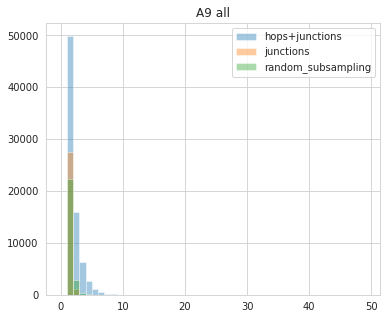

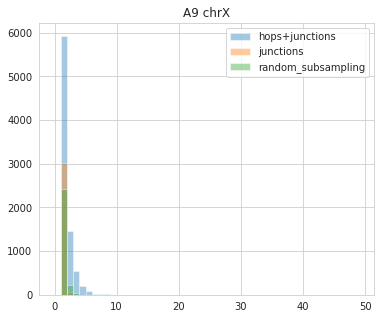

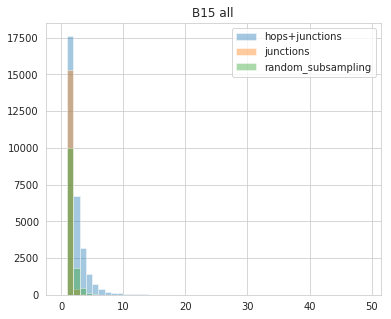

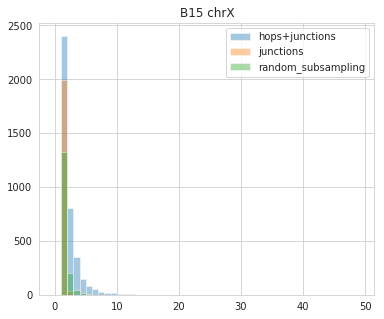

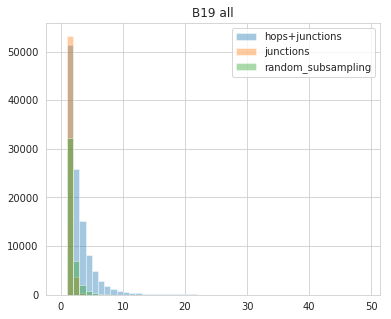

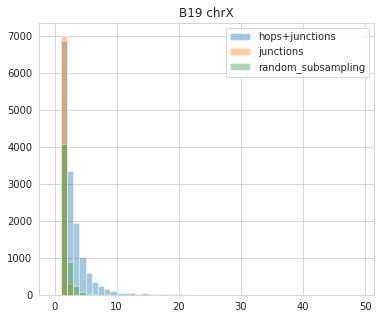

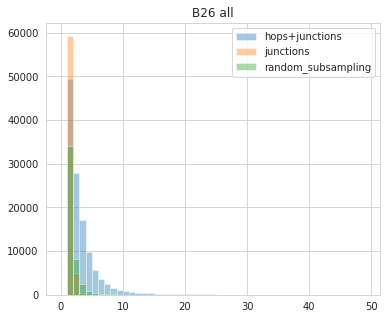

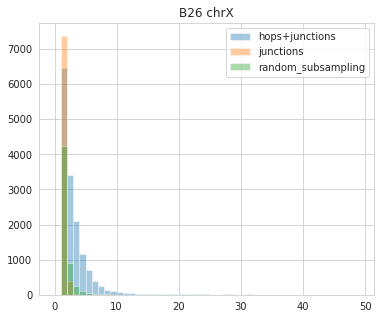

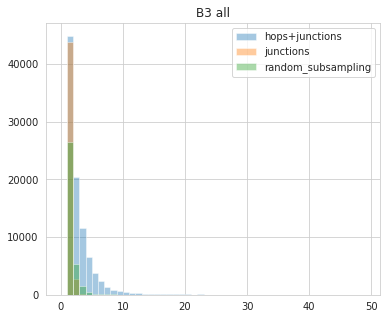

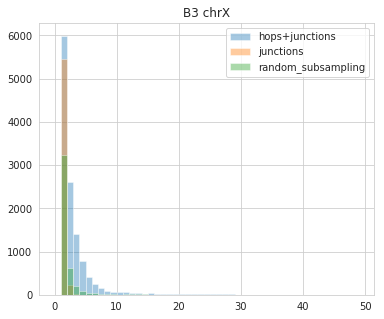

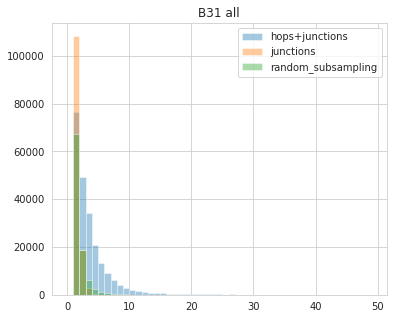

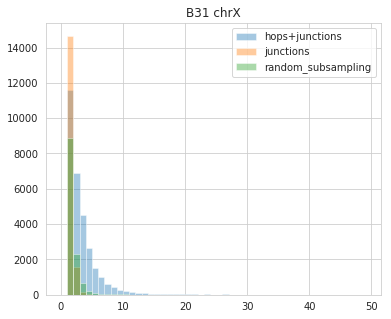

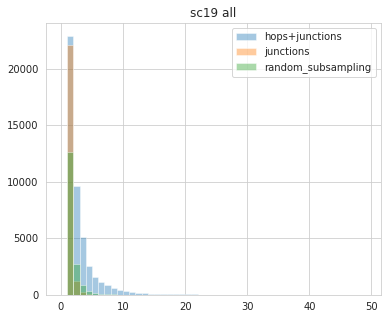

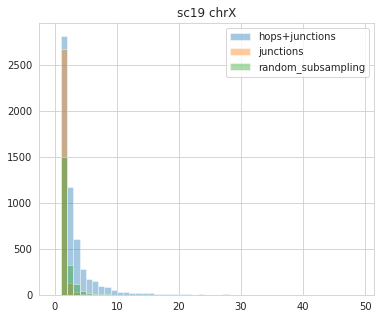

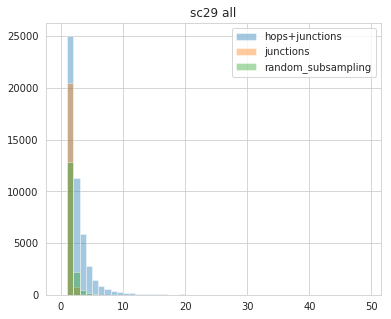

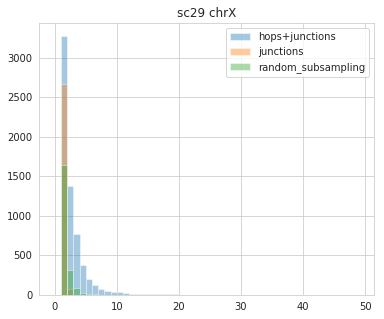

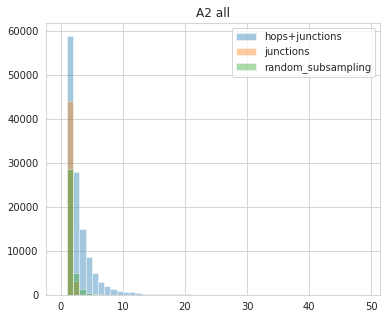

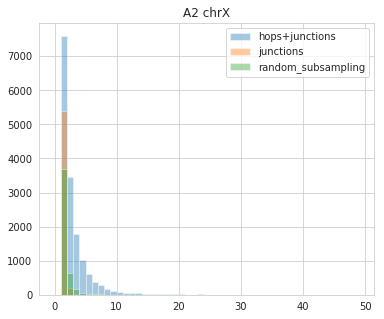

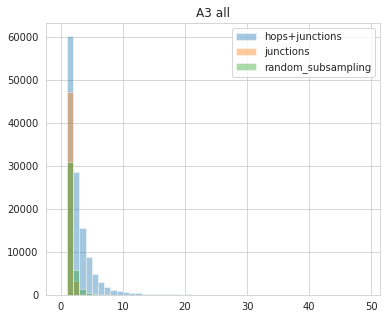

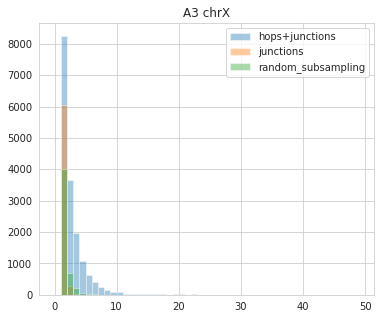

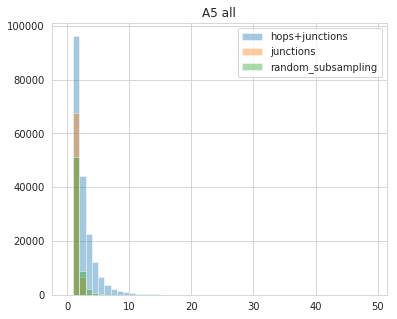

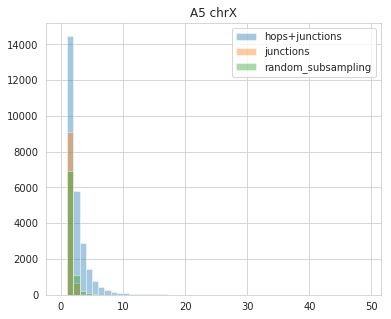

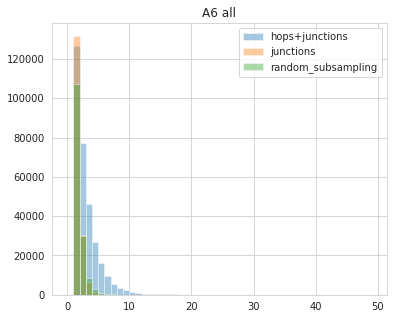

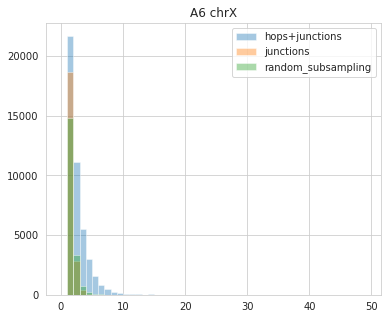

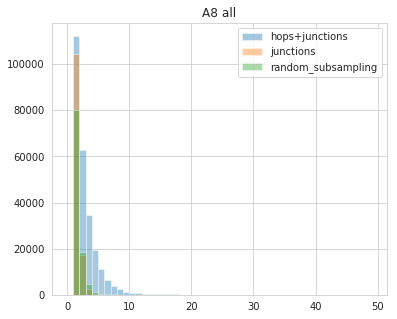

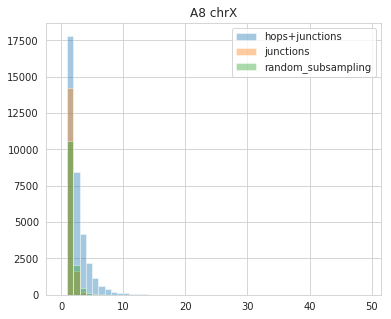

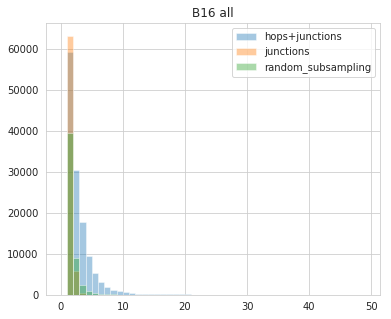

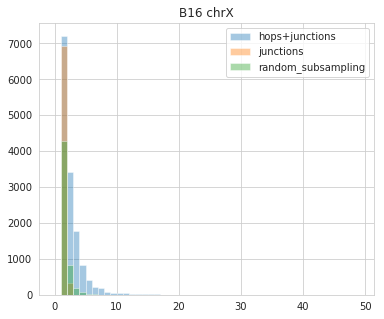

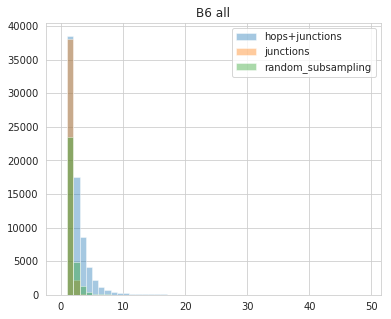

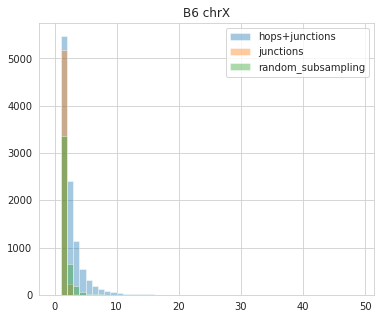

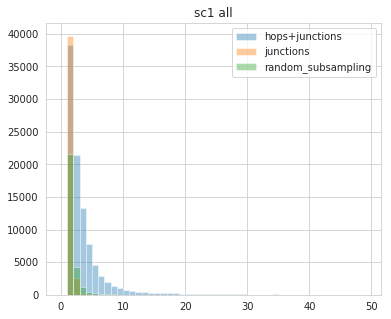

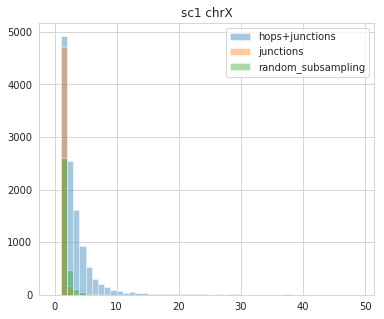

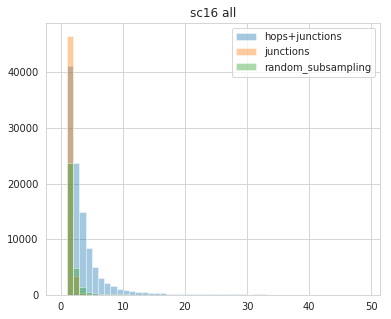

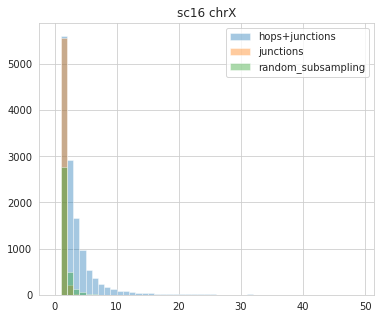

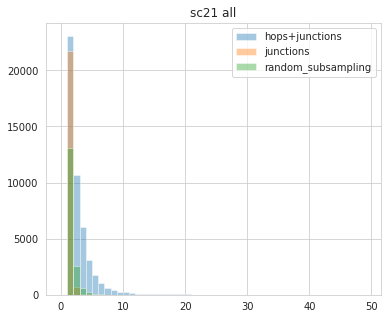

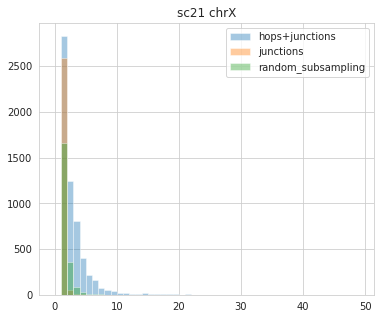

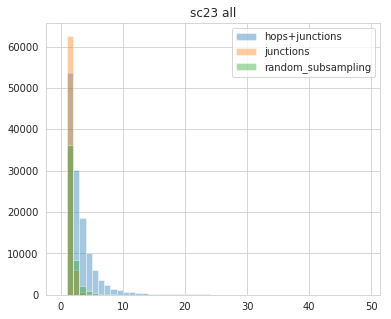

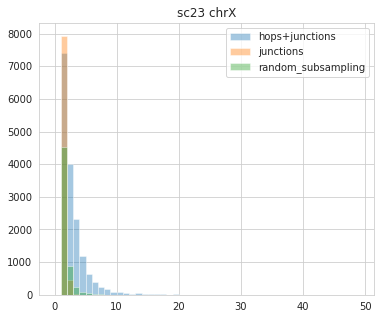

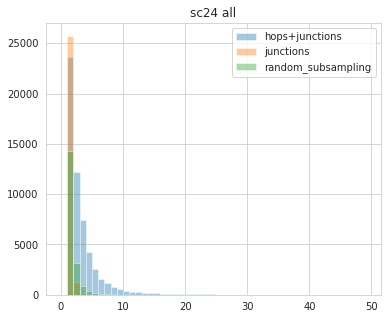

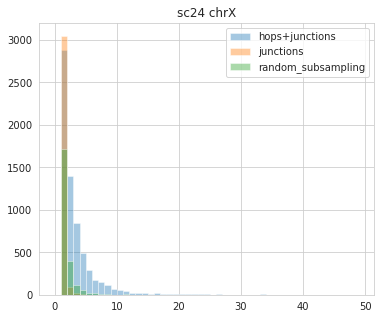

In [139]:
resolution = 10

for exp in exp

files = list(map(lambda x: PATH_COOL + x + ".{}.cool".format(resolution), experiment_ids))
labels = copy(experiment_ids)

files += [PATH_COOL + "merged_cell.{}.cool".format(resolution), PATH_COOL + "Dros.{}.cool.full".format(resolution*1000)]
labels += ['merged', 'population']

dataset = {x:{} for x in labels}
for l, f in zip(labels, files):
    print(f)
    c = cooler.Cooler(f)
    if 'population' in l:
        balance = True
    else:
        balance = False
    for chrom in c.chromnames:
        mtx = c.matrix(balance=balance).fetch('{0}'.format(chrom))
        dataset[l][chrom] = mtx.copy()

## Heatmaps: visualization and testing for randomness

In [119]:
MASK_COOL = "../DATA/COOL/{exp}.{res}.cool"
MASK_COOL_RAND = "../DATA_SHUF/COOL/{exp}.{res}.cool.random.0"
MASK_COOL_DROS_SUB = "../../examples_single_cell_2018/DATA_DROS/DROS_SUBSAMPLE/COOL/Dros.{exp}.{res}.cool.0"

In [73]:
resolution = 10

# dataset = {}

# balance = False
# for exp in experiment_ids_selected:
#     l = "{}".format(exp)
#     dataset[l] = {}
#     f = MASK_COOL.format(exp=exp, res=resolution)
#     c = cooler.Cooler(f)
#     for chrom in c.chromnames:
#         mtx = c.matrix(balance=balance).fetch('{0}'.format(chrom))
#         dataset[l][chrom] = mtx.copy()
        
for exp in experiment_ids_selected:
    l = "{}_shuf".format(exp)
    dataset[l] = {}
    f = MASK_COOL_RAND.format(exp=exp, res=resolution)
    try:
        c = cooler.Cooler(f)
        for chrom in c.chromnames:
            mtx = c.matrix(balance=balance).fetch('{0}'.format(chrom))
            dataset[l][chrom] = mtx.copy()
    except Exception as e:
        print(exp, e)
        
# for exp in experiment_ids_selected:
#     l = "{}_sampled".format(exp)
#     dataset[l] = {}
#     f = MASK_COOL_DROS_SUB.format(exp=exp, res=resolution)
#     c = cooler.Cooler(f)
#     for chrom in c.chromnames:
#         mtx = c.matrix(balance=balance).fetch('{0}'.format(chrom))
#         dataset[l][chrom] = mtx.copy()

sc23 Unable to open file (unable to open file: name = '../DATA_SHUF/COOL/sc23.10.cool.random.0', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
sc16 Unable to open file (unable to open file: name = '../DATA_SHUF/COOL/sc16.10.cool.random.0', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
sc24 Unable to open file (unable to open file: name = '../DATA_SHUF/COOL/sc24.10.cool.random.0', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
sc29 Unable to open file (unable to open file: name = '../DATA_SHUF/COOL/sc29.10.cool.random.0', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
sc19 Unable to open file (unable to open file: name = '../DATA_SHUF/COOL/sc19.10.cool.random.0', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
sc21 Unable to open file (unable to open file: name = '../DATA_SHUF/COOL/sc21.10.cool.random.0', errno = 2, error m

In [74]:
np.sum(np.logical_not(dataset['A6']['chr2L']==dataset['A6_shuf']['chr2L']))

36506

([], <a list of 0 Text yticklabel objects>)

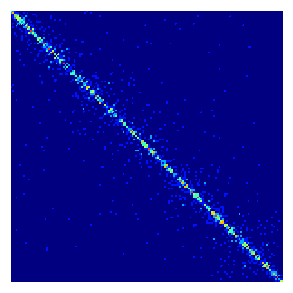

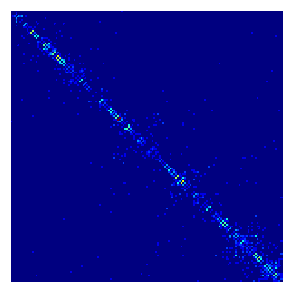

In [75]:
plt.figure(figsize=[5,5])
mtx = dataset['A6_shuf']['chr2L'][0:150,0:150]
sns.heatmap(mtx, square=True, cbar=False, cmap='jet')
plt.xticks([])
plt.yticks([])

plt.figure(figsize=[5,5])
mtx = dataset['A6']['chr2L'][0:150,0:150]
sns.heatmap(mtx, square=True, cbar=False, cmap='jet')
plt.xticks([])
plt.yticks([])

In [76]:
dataset_convolved = {}
for window_size in np.arange(1, 200, 10): #, 15, 20, 25, 50]:
    print(window_size)
    dataset_convolved[window_size] = {}
    for k in ['A6', 'A6_shuf', 'A6_sampled']:#list(dataset.keys()):
        print(k)
        chrms = list(dataset[k].keys())
        dataset_convolved[window_size][k] = {}
        for ch in chrms:
            mtx = dataset[k][ch]
            np.fill_diagonal(mtx, 0)
            mtx_conv = scipy.signal.convolve2d(np.triu(mtx), np.ones([window_size, window_size],dtype=int), 'valid')
            dataset_convolved[window_size][k][ch] = mtx_conv.copy()

5
A6
A6_shuf
A6_sampled
10
A6
A6_shuf
A6_sampled


In [123]:
dataset_convolved = {}

for k in ['A6', 'A6_shuf', 'A6_sampled']: #list(dataset.keys()):
    print(k)
    chrms = list(dataset[k].keys())
    dataset_convolved[k] = {}
    for ch in ['chr2L']:#chrms:
        print(k, ch)
        mtx = dataset[k][ch].copy()
        np.fill_diagonal(mtx, 0)
        dataset_convolved[k][ch] = {}
        for window_size in np.arange(1, 1000, 5):
            print(window_size)
            mtx_conv = scipy.signal.convolve2d(np.triu(mtx), np.ones([window_size, window_size],dtype=int), 'valid')
            dataset_convolved[k][ch][window_size] = mtx_conv

A6
A6 chr2L
5
10
15
20
25
30
35
A6_shuf
A6_shuf chr2L
5
10
15
20
25
30
35
A6_sampled
A6_sampled chr2L
5
10
15
20
25
30
35


In [156]:
mtx[idx]

array([ 6,  8, 11, ...,  3,  3,  2])

In [159]:
# Plot Ripley K function:

exp = 'A6'
ch = 'chr2L'

k = '{}'.format(exp)
k_shuf = '{}_shuf'.format(exp)
k_sampled = '{}_sampled'.format(exp)


x = np.array(list(dataset_convolved[k][ch].keys())).astype(int)
mtx = dataset_convolved[k][ch][x[1]]

y = np.array([dataset_convolved[k][ch][w][np.triu_indices(len(mtx)-w)].mean() for w in x])
y_std = np.array([dataset_convolved[k][ch][w][np.triu_indices(len(mtx)-w)].std() for w in x])

y_shuf = np.array([dataset_convolved[k_shuf][ch][w][np.triu_indices(len(mtx)-w)].mean() for w in x])
y_shuf_std = np.array([dataset_convolved[k_shuf][ch][w][np.triu_indices(len(mtx)-w)].std() for w in x])

y_sampled = np.array([dataset_convolved[k_sampled][ch][w][np.triu_indices(len(mtx)-w)].mean() for w in x])
y_sampled_std = np.array([dataset_convolved[k_sampled][ch][w][np.triu_indices(len(mtx)-w)].std() for w in x])


In [169]:
# Plot Ripley K function:

exp = 'A6'
ch = 'chr2L'

k = '{}'.format(exp)
k_shuf = '{}_shuf'.format(exp)
k_sampled = '{}_sampled'.format(exp)


x = np.array(list(dataset_convolved[k][ch].keys())).astype(int)
mtx = dataset_convolved[k][ch][x[1]]


n = 10

y = np.array([dataset_convolved[k][ch][w].diagonal(n).sum() for w in x])
y_std = np.array([dataset_convolved[k][ch][w].diagonal(n).std() for w in x])

y_shuf = np.array([dataset_convolved[k_shuf][ch][w].diagonal(n).sum() for w in x])
y_shuf_std = np.array([dataset_convolved[k_shuf][ch][w].diagonal(n).std() for w in x])

y_sampled = np.array([dataset_convolved[k_sampled][ch][w].diagonal(n).sum() for w in x])
y_sampled_std = np.array([dataset_convolved[k_sampled][ch][w].diagonal(n).std() for w in x])


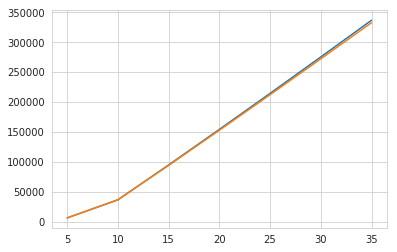

In [170]:
plt.plot(x, y)
#plt.fill_between(x, y-y_std, y+y_std, alpha=0.1)

plt.plot(x, y_shuf)
#plt.fill_between(x, y_shuf-y_shuf_std, y_shuf+y_shuf_std, alpha=0.1)

#plt.plot(x, y_sampled)
#plt.fill_between(x, y_sampled-y_sampled_std, y_sampled+y_sampled_std, alpha=0.1)

In [140]:
y

array([0.06972934, 0.2797897 , 0.63125413, 1.12517611, 1.76262371,
       2.54449999, 3.47172182])

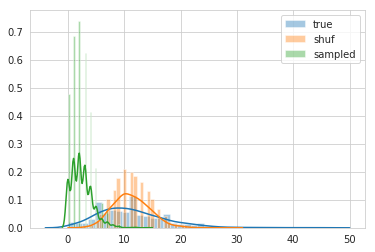

In [103]:
window_size = 5
distance = 0
exp = 'A6'
ch = 'chr2L'

v_true    = dataset_convolved[window_size]["{}".format(exp)][ch].diagonal(distance)
v_shuf    = dataset_convolved[window_size]["{}_shuf".format(exp)][ch].diagonal(distance)
v_sampled = dataset_convolved[window_size]["{}_sampled".format(exp)][ch].diagonal(distance)

plt.figure(figsize=[6,4])
sns.distplot(v_true, label='true')
sns.distplot(v_shuf, label='shuf')
sns.distplot(v_sampled, label='sampled')
plt.legend()

/home/agalicina/anaconda3/envs/distiller-editable/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/home/agalicina/anaconda3/envs/distiller-editable/lib/python3.6/site-packages/scipy/optimize/optimize.py:2308: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


2.4288317279012888


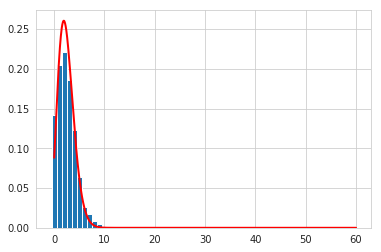

In [106]:
from scipy.optimize import minimize
from scipy.special import factorial

def poisson(k, lamb):
    """poisson pdf, parameter lamb is the fit parameter (lambda)"""
    return (lamb**k/factorial(k)) * np.exp(-lamb)

def negLogLikelihood(params, data):
    """ the negative log-Likelohood-Function"""
    lnl = - np.sum(np.log(poisson(data, params[0])))
    return lnl


data = v_sampled

# minimize the negative log-Likelihood
result = minimize(negLogLikelihood,  # function to minimize
                  x0=np.zeros(1),     # start value
                  args=(data,),      # additional arguments for function
                  method='Powell',   # minimization method, Powell minimization
                  )
print(result.x)

# plot poisson-deviation with fitted parameter
x_plot = np.linspace(0, 60, 1000)

plt.hist(data, bins=np.arange(60) - 0.5, density=True)
plt.plot(x_plot, poisson(x_plot, result.x), 'r-', lw=2)
plt.show()

In [171]:
%R library(spatstat)

/home/agalicina/anaconda3/envs/distiller-editable/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: spatstat.data

  warnings.warn(x, RRuntimeWarning)
/home/agalicina/anaconda3/envs/distiller-editable/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: nlme

  warnings.warn(x, RRuntimeWarning)
/home/agalicina/anaconda3/envs/distiller-editable/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: rpart

  warnings.warn(x, RRuntimeWarning)
/home/agalicina/anaconda3/envs/distiller-editable/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
spatstat 1.57-1       (nickname: ‘Cartoon Physics’) 
For an introduction to spatstat, type ‘beginner’ 


  warnings.warn(x, RRuntimeWarning)
/home/agalicina/anaconda3/envs/distiller-editable/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Not

array(['spatstat', 'rpart', 'nlme', 'spatstat.data', 'ggplot2', 'tools',
       'stats', 'graphics', 'grDevices', 'utils', 'datasets', 'methods',
       'base'], dtype='<U13')

In [380]:
df = pd.read_csv('../../examples_single_cell_2018/DATA_SHUF/TXT/SPARSE/sparse_bins.A6.10.chr2L.txt', sep='\t')
x = df.bin1_id.values
y = df.bin2_id.values
x, y = np.concatenate([x,y]), np.concatenate([y,x])

df = pd.read_csv('../../examples_single_cell_2018/DATA/TXT/SPARSE/sparse_bins.A6.10.chr2L.txt', sep=',')
x1 = df.bin1_id.values
y1 = df.bin2_id.values
x1, y1 = np.concatenate([x1,y1]), np.concatenate([y1,x1])


mask = (np.abs(x-y)>0) #& (x>1000) #& (y<1500)
x = x[mask]
y = y[mask]

wx = np.array([min(x), max(x)])
wy = np.array([min(y), max(y)])

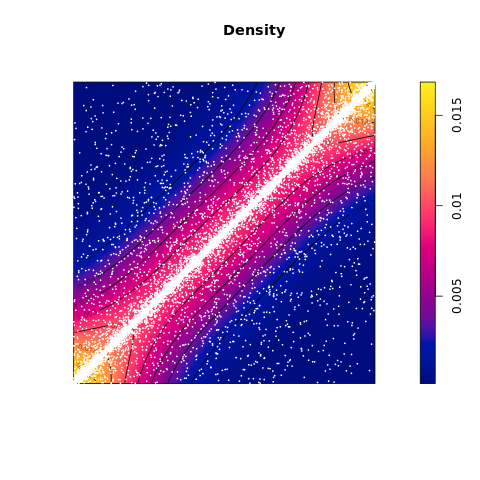

In [381]:
%%R -i x -i y -i wx -i wy
X <- ppp(c(x), c(y), window=owin(xrange=c(wx), yrange=c(wy)))
X.den <- density(X)
plot(X.den, main="Density")
contour(X.den, add=T)
points(X, pch=20, cex=0.001, col='white')

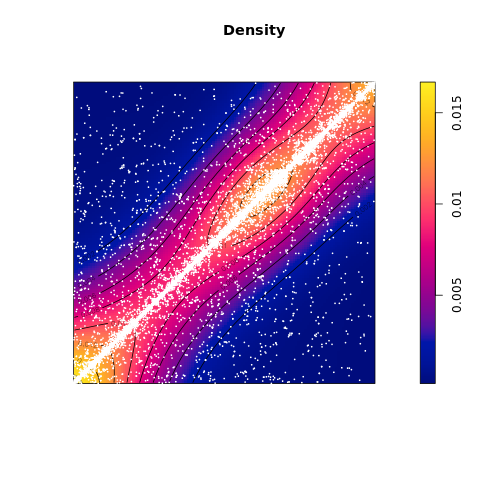

In [382]:
%%R -i x1 -i y1 -i wx -i wy
x = x1
y = y1
X <- ppp(c(x), c(y), window=owin(xrange=c(wx), yrange=c(wy)))
X.den <- density(X)
plot(X.den, main="Density")
contour(X.den, add=T)
points(X, pch=20, cex=0.001, col='white')

In [385]:
%%R -i x -i y -i wx -i wy -i x1 -i y1

X <- ppp(c(x), c(y), window=owin(xrange=c(wx), yrange=c(wy)))
K <- Kest(X, correction="all")
X1 <- ppp(c(x1), c(y1), window=owin(xrange=c(wx), yrange=c(wy)))
K1 <- Kest(X1, correction="all")

#plot(K, main="K function for cells")
#par(new=TRUE)
#plot(K1, main="K function for cells", add=True)

#X <- runifpoint(50)
#print(X)
#K <- Kest(X, rmax=20)
#E <- envelope(Y = X, fun = Kest, nsim = 20, correction='all', rmax=20)
# plot(K)
# plot the L function
# plot(K, sqrt(iso/pi) ~ r)
#plot(K, sqrt(./pi) ~ r, ylab="L(r)", main="L function for cells")

Function value object (class ‘fv’)
for the function r -> K(r)
........................................................................
           Math.label       Description                                 
r          r                distance argument r                         
theo       K[pois](r)       theoretical Poisson K(r)                    
un         hat(K)[un](r)    uncorrected estimate of K(r)                
bord.modif hat(K)[bordm](r) modified border-corrected estimate of K(r)  
border     hat(K)[bord](r)  border-corrected estimate of K(r)           
trans      hat(K)[trans](r) translation-corrected estimate of K(r)      
rigid      hat(K)[rigid](r) rigid motion-corrected estimate of K(r)     
iso        hat(K)[iso](r)   Ripley isotropic correction estimate of K(r)
........................................................................
Default plot formula:  .~r
where “.” stands for ‘iso’, ‘rigid’, ‘trans’, ‘border’, 
‘bord.modif’, ‘un’, ‘theo’
Recommended range of arg

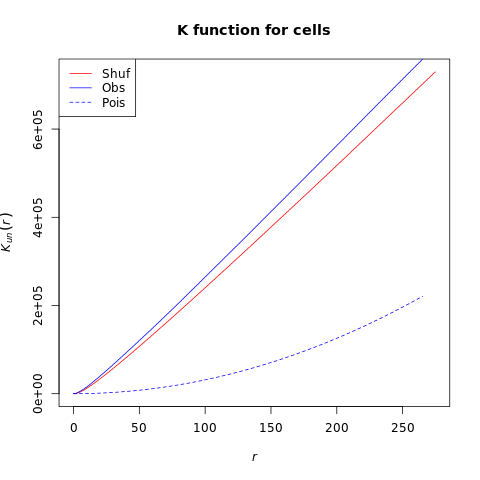

In [386]:
%%R
print(K)
plot(K, un ~ r, main="K function for cells", col='red')
plot(K1, un ~ r, col='blue', add=TRUE)
plot(K1, theo ~ r, col='blue', add=TRUE, lty=2)
legend("topleft", legend=c('Shuf', 'Obs', "Pois"), col=c('red', 'blue', 'blue'), lty=c(1, 1, 2))
#par(new=TRUE)
#plot(K1, main="K function for cells", add=TRUE)